In [0]:
csv = "https://raw.githubusercontent.com/andybbruno/DataMining/master/kids_train_cleaned.csv?token=AI2AUE57WCSSJEDHVD3Y6SC6AXC7Q"

In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [0]:
df = pd.read_csv(csv)
df.drop(df.columns[0], axis=1, inplace=True)

In [0]:
df_clus = df[['AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 
             'CRAP', 'CRCP', 'VehBCost', 'WarrantyCost', 'VehOdo', 'PCA1', 'PCA2']]
df_clus = df_clus[0:20000]

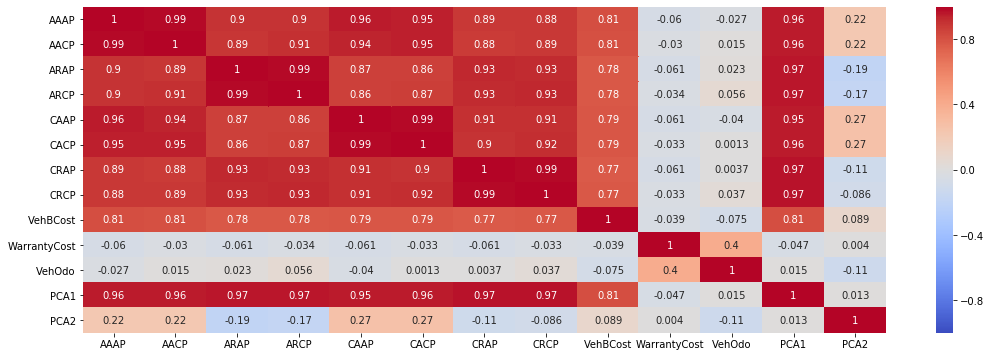

In [5]:
corr=df_clus.corr()
plt.subplots(figsize =(18,6))
ax = plt.axes()

sns.heatmap(corr, ax = ax,
                xticklabels=corr.columns.values, annot=True,
                yticklabels=corr.columns.values, cmap="coolwarm", vmax=1, vmin=-1)

In [0]:
df_1 = df_clus[['VehOdo', 'VehBCost', 'AAAP']]
df_2 = df_clus[['WarrantyCost', 'VehBCost', 'VehOdo']]

In [0]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df_2.values)

In [0]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
results = []
linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']
for k in range(2, 11):
  for l in linkages:
    for metr in metrics:
      if l == 'ward' and metr != 'euclidean':
        continue
      res = AgglomerativeClustering(n_clusters=k, affinity=metr, linkage=l).fit(scaled_df)
      results.append({
        'res': res,
        'k': k,
        'silu': silhouette_score(scaled_df, res.labels_, metric = metr),
        'link': l,
        'metric': metr
      })
  print("end k = ", k)

end k =  2
end k =  3
end k =  4
end k =  5
end k =  6
end k =  7
end k =  8
end k =  9
end k =  10


In [0]:
plot_res = next(x['res'] for x in results if x['k'] == 6 and x['metric'] == 'euclidean' and x['link'] == 'ward')

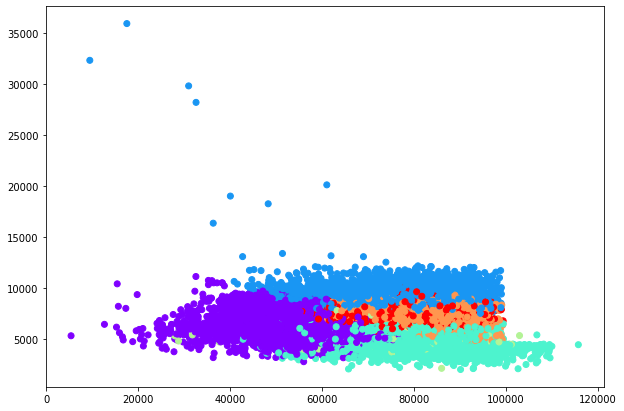

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(df_2['VehOdo'], df_2['VehBCost'], c=plot_res.labels_, cmap='rainbow')

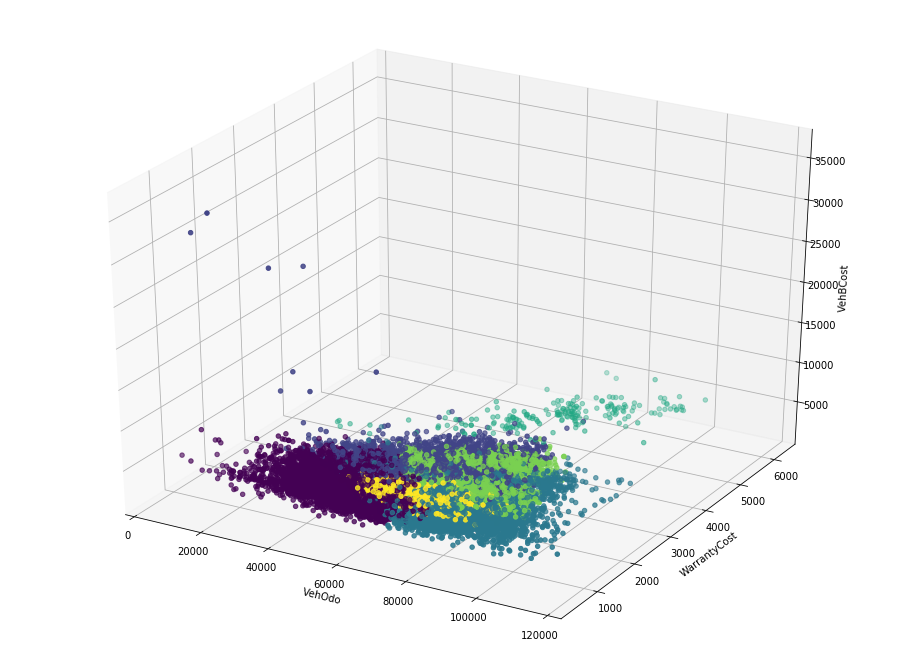

In [16]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df_2['VehOdo'],
           df_2['WarrantyCost'],
           df_2['VehBCost'],
           c=plot_res.labels_, marker='o')
ax.set_xlabel('VehOdo')
ax.set_ylabel('WarrantyCost')
ax.set_zlabel('VehBCost')
plt.show()

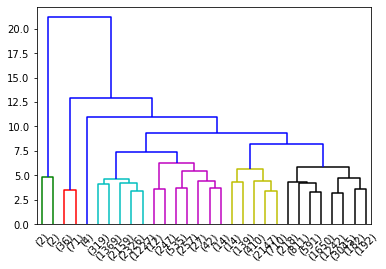

In [17]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=7, truncate_mode='lastp')

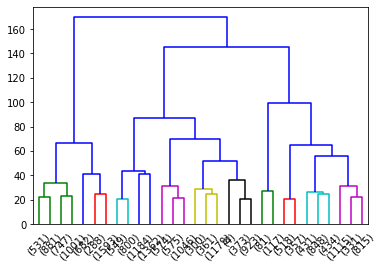

In [18]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=40, truncate_mode='lastp')

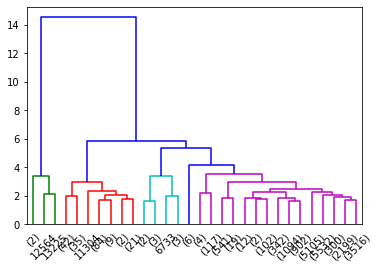

In [19]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=4, truncate_mode='lastp')

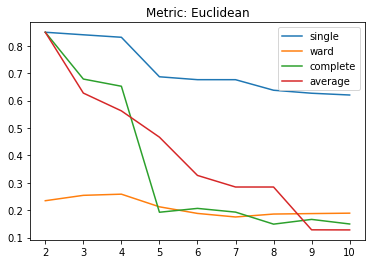

In [20]:
x = range(2, 11)
fig, ax = plt.subplots()
y1 = [a for a in results if a['link'] == 'single' and a['metric'] == 'euclidean']
y2 = [a for a in results if a['link'] == 'ward' and a['metric'] == 'euclidean']
y3 = [a for a in results if a['link'] == 'complete' and a['metric'] == 'euclidean']
y4 = [a for a in results if a['link'] == 'average' and a['metric'] == 'euclidean']

ys = [y1, y2, y3, y4]

for e in ys:
  l = e[0]['link']
  ax.plot(x, [s['silu'] for s in e], label=l)

ax.set_title('Metric: Euclidean')

ax.legend()

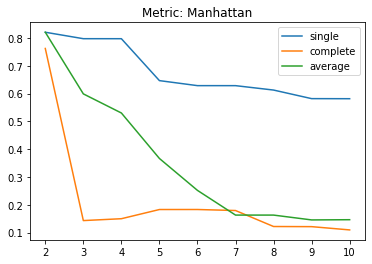

In [21]:
x = range(2, 11)
fig, ax = plt.subplots()
y1 = [a for a in results if a['link'] == 'single' and a['metric'] == 'manhattan']
y3 = [a for a in results if a['link'] == 'complete' and a['metric'] == 'manhattan']
y4 = [a for a in results if a['link'] == 'average' and a['metric'] == 'manhattan']

ys = [y1, y3, y4]

for e in ys:
  l = e[0]['link']
  ax.plot(x, [s['silu'] for s in e], label=l)

ax.set_title('Metric: Manhattan')

ax.legend()